In [1]:
# Standard dist imports
import os
import sys
sys.path.insert(0, os.path.abspath(os.path.pardir))

# Third party imports
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

# Project level imports
from utils.constants import *

# Module level constants
DEBUG = False
PHASE = TRAIN
SET_ID = 'set00'

In [4]:
# Read in dataset
src_dir = os.path.abspath(os.pardir)
filename = os.path.join(src_dir, 'dataset/data_{}.csv'.format(PHASE))
df = pd.read_csv(filename)
df = df[df[Col.VALID] == True]

# Filter for desired set_id
df = df[df[Col.SET] == SET_ID]
df = df[df[Col.N_LABELS] != 0].reset_index(drop=True)

In [5]:
df.head()

,images,valid,set,video,frame,coordinates,label,n_labels,occl,hide,lock,phase
0,/data6/lekevin/fast_track/caltech-pedestrian-d...,True,set00,V002,689,"[[478.1602790450138, 145.63964379479177, 63.34...","['person?', 'person']",2,"[0, 0]","[0, 0]","[0, 0]",train
1,/data6/lekevin/fast_track/caltech-pedestrian-d...,True,set00,V001,848,"[[501.68504021070737, 163.17225543819004, 17.5...","['person', 'person', 'person']",3,"[0, 0, 1]","[0, 0, 0]","[0, 0, 0]",train
2,/data6/lekevin/fast_track/caltech-pedestrian-d...,True,set00,V008,747,"[[291.9790029092456, 161.3796381182147, 26.600...",['person'],1,[0],[0],[0],train
3,/data6/lekevin/fast_track/caltech-pedestrian-d...,True,set00,V007,1894,"[[480.7744598973485, 172.407445004218, 19.9008...","['person', 'person', 'person']",3,"[0, 1, 0]","[0, 0, 0]","[0, 0, 0]",train
4,/data6/lekevin/fast_track/caltech-pedestrian-d...,True,set00,V000,1159,"[[568.2746987846243, 165.50952339378912, 16.49...","['person-fa', 'people', 'people']",3,"[0, 0, 1]","[0, 0, 0]","[0, 0, 0]",train


In [6]:
df.label.value_counts()

['person']                                                                                                        1722
['people']                                                                                                        1691
['person', 'person', 'person']                                                                                    1127
['person', 'person', 'person', 'person']                                                                          1047
['person', 'person']                                                                                               950
['people', 'person']                                                                                               841
['people', 'person', 'person']                                                                                     746
['person', 'person', 'person', 'person', 'person']                                                                 655
['people', 'person', 'person', 'person', 'person

In [8]:
def plot_image(image_name, coordinate):
    n_rows, n_cols = 1, 1
    plt_width, plt_height = 5, 5
    f, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*plt_width, n_rows*plt_height))

    # Grab coordinates and images
    img = cv2.imread(image_name)
    data = eval(coordinate)

    for datum in data:
        # Draw bounding boxes
        x, y, w, h = [int(v) for v in datum]
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    ax.imshow(img)
    plt.tight_layout()
    plt.show()

person = df[df[Col.LABEL] == "[u'person']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Col.IMAGES]
    coordinate = person.iloc[idx][Col.COORD]
    print('Video: {}'.format(person.iloc[idx][Col.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Col.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Col.N_LABELS]))
    plot_image(image_name, coordinate)

ValueError: a must be greater than 0

Video: V012
Label type: [u'people']
Number of labels: 1


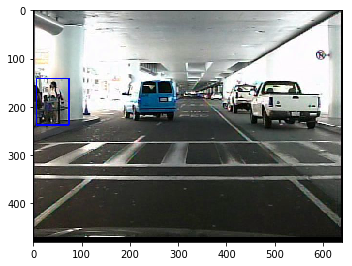

Video: V003
Label type: [u'people']
Number of labels: 1


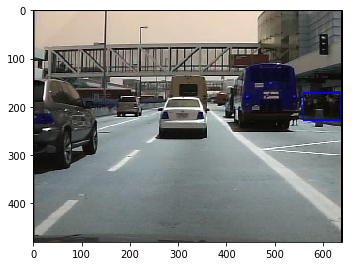

Video: V012
Label type: [u'people']
Number of labels: 1


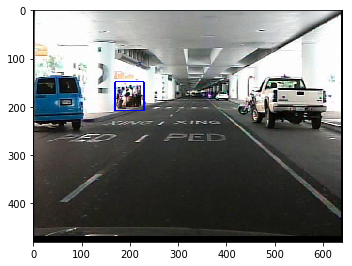

In [62]:
person = df[df[Columns.LABEL] == "[u'people']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)

Video: V002
Label type: [u'person?']
Number of labels: 1


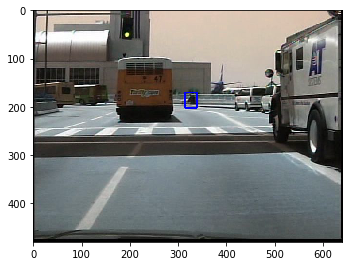

Video: V002
Label type: [u'person?']
Number of labels: 1


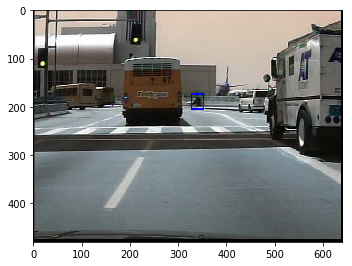

Video: V002
Label type: [u'person?']
Number of labels: 1


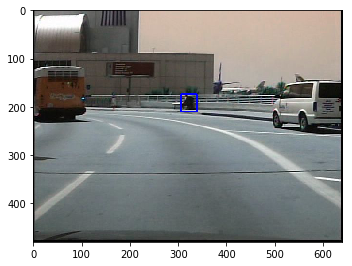

In [63]:
person = df[df[Columns.LABEL] == "[u'person?']"].reset_index(drop=True)
for i in range(3):
    idx = np.random.choice(person.shape[0])
    image_name = person.iloc[idx][Columns.IMAGES]
    coordinate = person.iloc[idx][Columns.COORD]
    print('Video: {}'.format(person.iloc[idx][Columns.VIDEO]))
    print('Label type: {}'.format(person.iloc[idx][Columns.LABEL]))
    print("Number of labels: {}".format(person.iloc[idx][Columns.N_LABELS]))
    plot_image(image_name, coordinate)